# **Fuel Economy Analysis**
## Loading the data 

In [301]:
#import necessary libraries and set the theme to default
import pandas as pd
import seaborn as sns

sns.set_theme()

In [3]:
#read in the mpg dataset and look at the top 5 rows
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Project steps
#### 1) Create a visual showing the relationship between horsepower and fuel economy

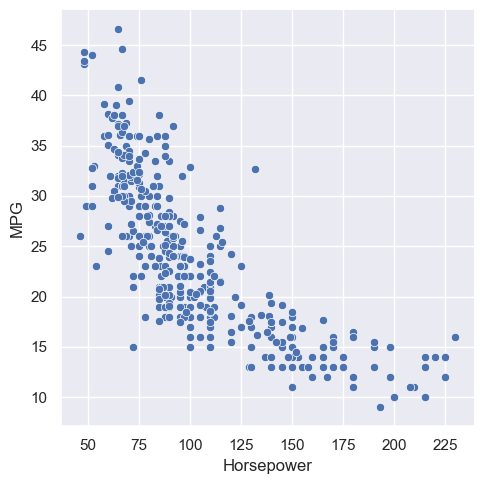

In [142]:
sns.relplot(
    data = mpg,
    x = "horsepower",
    y = "mpg"
).set(
    xlabel = "Horsepower",
    ylabel = "MPG"
)

<span style="color:red">In the above scatter plot, there is a clear trend where as a car's horsepower increases its mpg decreases. Additionally, as the horsepower increases the variation of mpg also decreases.</span> 

#### 2) Create a table summarizing fuel economy by country of origin


In [130]:
avg_mpg = mpg.groupby('origin').mpg.mean().to_frame().reset_index()
avg_mpg['mpg'] = avg_mpg['mpg'].round(2)
avg_mpg.rename(columns = {"mpg": "Average MPG", "origin":"Origin"})

,Origin,Average MPG
0,europe,27.89
1,japan,30.45
2,usa,20.08


<span style="color:red">The table shows Japan having the highest average mpg at 30.45, with Europe second at 27.89, and USA third at 20.08.</span> 

#### 3) Create a visual showing how fuel economy has changed over time


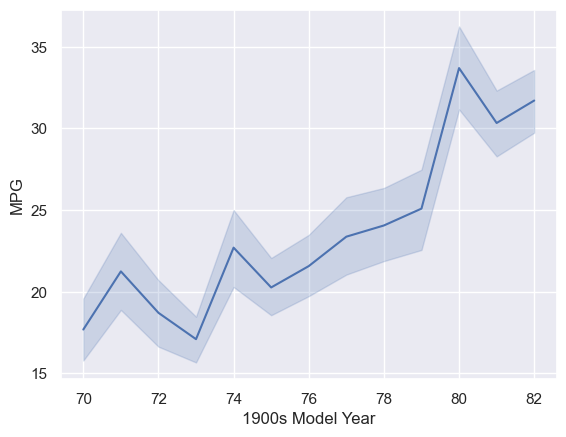

In [236]:
lineplot = sns.lineplot(
    data = mpg,
    x = "model_year", 
    y = "mpg",
).set(
    xlabel =  "1900s Model Year",
    ylabel = "MPG"
)

<span style="color:red">Although there is some variation, over the years 1970 to 1982 car models increased their average mpg. 1970 models averaged around 18 mpg while 1982 models averaged around 32 mpg</span> 

#### 4) Create two other visuals or tables related to fuel economy.


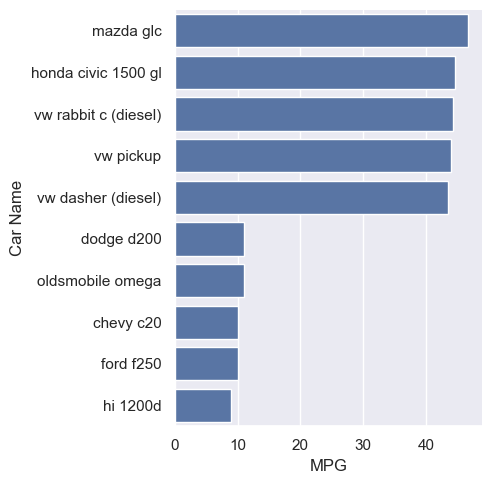

In [264]:
top5models = mpg.groupby('name').mean('mpg').sort_values('mpg', ascending = False).head()
bottom5models = mpg.groupby('name').mean('mpg').sort_values('mpg', ascending = True).head()
top5bottom5 = pd.concat([top5models, bottom5models]).sort_values('mpg', ascending = False)

sns.catplot(
    data = top5bottom5,
    y = "name",
    x = "mpg",
    kind = "bar"
).set(
    ylabel = "Car Name",
    xlabel = "MPG"
)


<span style="color:red">This visual shows the car names for the ones with the 5 highest mpg and the 5 lowest mpg. It seems the car with the best mpg is the "mazda glc" with an average mpg of 46.6. The car with the worst mpg is the "hi 1200d" at an average mpg of 9.0. One more interesting thing to note is that three of the five car models with the highest mpg are VW vehicles.</span> 

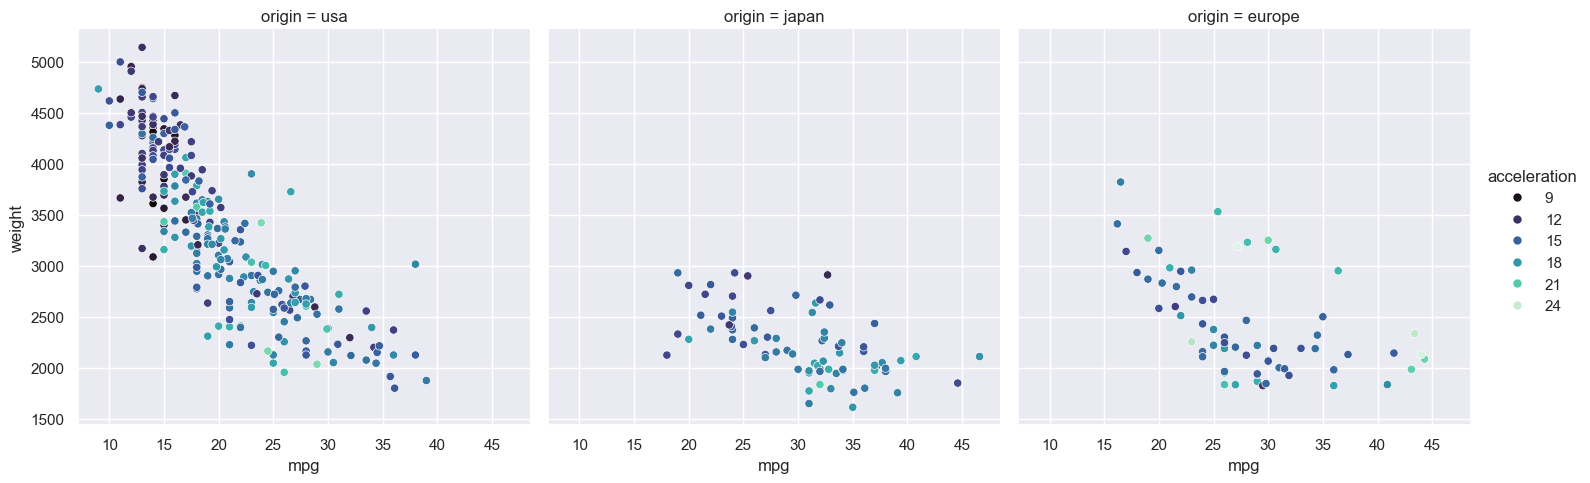

In [313]:
sns.relplot(
    data=mpg,
    x="mpg",y="weight",
    col='origin', #row="day",
    hue="acceleration",
    palette='mako'
)

<span style="color:red">This visual has a few more layers than the previous ones. There are three different scatter plots to seperate the data between the three origins USA, Japan, Europe. The main axes are comparing the relationship between average mpg and the car's weight. The legend on the left shows a color map that shows how each point has a color corresponding to the car's acceleration.

<span style="color:red">One thing to note is that it looks like generally cars with lower accelration tend to have lower average mpg. Another interesting observation is that USA has much more heavy cars than the other two countries. USA's heaviest car has a weight over 5000, while all of Europe's cars are under 4000 and all of Japan's are under 3000.

<span style="color:red">Lastly, it looks like there is a trend where lighter cars seem to have higher mpg. Although there is a trend, there also seems to be lots of variation due to the scatter plots having a wide spread.</span> 